# <center>EDA (Exploratory Data Analisys)</center>

# 1. Prepare Module and Dataset

In [1]:
import pandas as pd
import numpy as np 

#Statistics Module 
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import anderson, shapiro
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from scipy import stats
import pylab
from collections import Counter

# Check Normalization of the Data
#from statsmodels.graphics.gofplots import qqplot

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

## Load Dataset 

In [2]:
#classification
df_classification = pd.read_csv('data/insurance2.csv')

#simple regression
df_regression = pd.read_csv('data/data_startup.csv')

# Forecesting Dataset 
df_forecasting = pd.read_csv('data/currency.csv')

# Home Credit dataset 
df_houseprice = pd.read_csv('data/House Price.csv')

## 1.1. Preview Dataset

In [3]:
#preview dataset 
def preview_df(df, options = None):
    '''
    Preview dataset is one of exploratory data analysis part, which is 
    we will know what the dataset is. 

    Paramaters :
    ------------
    df      :   object, DataFrame
            Dataset that will be used  
    option  :   Optional(default = 'top record data')
            1. top_record data  : Showing top record data(default = 10)
            2. shape_data       : showing how many rows and column of dataset
            3. info_data        : showing how many columns that includes missing value
                                  and knowing what the data type is of each column. 
    '''
    #default option is Top record 
    if options == None :
        options = 'top_record'
    
    if options == 'top_record':
        print('=>> Top 10 Record Data : ','\n')
        df = df.head(10)
        return df 

    if options == 'shape_data':
        print('=>> Data shape : ','\n')
        df = df.shape
        return df

    if options == 'info_data':
        print('=>> Data Info : ','\n')
        df = df.info()
        return df

In [4]:
#exploratory data analysis 
#preview dataset top 10 record 
preview_df(df_regression, options='top_record')

=>> Top 10 Record Data :  



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
#preview shape dataset
preview_df(df_regression, options='shape_data')


=>> Data shape :  



(50, 5)

In [6]:
#preview info dataset
preview_df(df_regression, options='info_data')

=>> Data Info :  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [7]:
# Statistics Descriptive
def Describe(df,col=None):
    '''
    Documentation :
    --------------
    * df  : Dataframe Name
    * col : Columns Name    
    '''
    if col is None :
        describe = df.describe()
    else:
        describe = df[col].describe()
        
    return describe

In [8]:
Describe(df_regression)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## 1.2. Seperate Feature (Numerical and Categorical)

In [9]:
def check_dtypes_1(df):
    '''
    Parameters :
    ------------
    df : Dataframe name 

    Step :
    ------
    > 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    > 2. Columns in dataframe will be seperated based on the dtypes
    > 3. All of the column will be entered to the list that have been created

    result :
    --------
    The result will be formed as dataframe
    '''
    # Make a list for both of the data type 
    categorical_list = []
    numerical_list = []
    
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
        else:
            numerical_list.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_list, name='Categorical Feature')
    numerical = pd.Series(numerical_list, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [10]:
#1. Input dataframe
dataframe = df_regression
#2. Seperated 
check_dtypes_1(dataframe)

,Categorical Feature,Numerical Feature
0,State,R&D Spend
1,NaN,Administration
2,NaN,Marketing Spend
3,NaN,Profit


## 1.3. Seperate Feature (Float, Int, and Object)

In [11]:
def check_dtypes_2(df):
    '''
    Parameters :
    ------------
    df : Dataframe name 
    
    Step :
    > 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    > 2. Columns in dataframe will be seperated based on the dtypes
    > 3. All of the column will be entered to the list that have been created

    result:
    The result will be formed as dataframe
    '''
    # Seperate the features based on types of data
    float_type = []
    int_type = []
    object_type = []
    
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype =='float64':
            float_type.append(col)
        elif df[col].dtype =='int64':
            int_type.append(col)
        else:
            object_type.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature 
    float = pd.Series(float_type, name='float type')
    int = pd.Series(int_type, name='int type')
    object = pd.Series(object_type, name='object type')
    df_dtypes = pd.concat([float,int,object], axis=1)
    
    return df_dtypes

In [12]:
# 1. Input  dataframe
dataframe = df_classification

# 2. Input df to the module 
check_dtypes_2(dataframe)

,float type,int type,object type
0,bmi,age,NaN
1,charges,sex,NaN
2,NaN,children,NaN
3,NaN,smoker,NaN
4,NaN,region,NaN
5,NaN,insuranceclaim,NaN


## 1.4. Checeking Unique Columns 

In [13]:
def unique_columns(df):
    '''
    Parameter 
    ---------
    df : array
        the data frame that will be checked the unique the entities 
    '''
    for col in df.columns:
        if df[col].dtypes == 'object':
            unique_cat = len(df[col].unique())
            print("Feature '{col}' has {unique_cat} unique categories".format(col=col, unique_cat=unique_cat))

In [14]:
unique_columns(df_regression)

Feature 'State' has 3 unique categories


## 1.5. Missing Value

In [15]:
# module Check missing value 
def missing_value(df):
    '''
    Documentation :
    --------------
    * df : Dataframe Name
    '''
    #count the number of missing value 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent(%)'])
    
    return missing.head(20)

In [16]:
#1. input dataframe
dataframe = df_houseprice

#2. input dataframe to the module 
missing_value(dataframe)

,Total_Missing,Percent(%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### 1.4.1. Drop Feature > threshold

In [17]:
def Drop_Missing_value(df, threshold = None):
    '''
    Parameters :
    ------------
    df              :  Object, Dataframe
                    the dataframe which want to dropped     
    threshold       :   float, default (0.75)
                    the number of threshold was determined by user 
    '''
    #default number of threshold 
    if threshold == None : 
        threshold = 0.75

    # Define variable that we need 
    threshold = threshold
    size_df   = df.shape[0]

    # Define Column list that will we removed
    dropcol   = []

    #looping to take the number of null of every feature 
    for col in df.columns :
        if (df[col].isnull().sum()/size_df >= threshold):
            dropcol.append(col)
    print('Columns that have been removed : ')
    print ('_'*29)
    
    # Make df using pd.concat
    drop_col = pd.Series(dropcol, name='Features')
    drop_col = pd.concat([drop_col], axis = 1)
    
    print(drop_col)
    
    df = df.drop(dropcol, axis =1)

    return df


In [18]:
df_houseprice = Drop_Missing_value(df_houseprice, threshold=0.80)

Columns that have been removed : 
_____________________________
      Features
0        Alley
1       PoolQC
2        Fence
3  MiscFeature


### 1.4.2. Seperate dtyped

In [19]:
def list_dtypes(df):
    categorical_list = []
    numerical_list = []
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
        else:
            numerical_list.append(col)
    print('Number of categorical features:', str(len(categorical_list)))
    print('Number of numerical features:', str(len(numerical_list)))

    return categorical_list, numerical_list

In [20]:
categorical_list, numerical_list = list_dtypes(df_houseprice)

Number of categorical features: 39
Number of numerical features: 38


### 1.4.3. Filling Missing Value

In [21]:
def fill_missing(df, feature_list = None , vartype = None ):
    '''
    Documentation :
    ---------------
    df              : object, dataframe
    feature_list    : feature list is the set of numerical or categorical features 
                      that have been seperated before
    vartype         : variable type : continuos or categorical, default (numerical)
                        (0) numerical   : variable type continuos/numerical
                        (1) categorical : variable type categorical
    Note :
    ------
    > if numerical variable will be filled by median 
    > if categorical variabe will filled by modus
    > if have been made variebles based on the dtypes list before, 
      insert it into feature list in the function.     

    Example :
    ---------
    # 1. Define feature that will be filled in 
      num_feature = numeric_list
      
    # 2. Input Dataframe
      dataframe = df
      
    # 3. Vartype
      var_type = 0
      
    # 4. Filling Value
      Fill_missing(dataframe, num_feature, var_type)
    '''
    #default vartype 
    if vartype == None :
        vartype = 'numerical'

    # filling numerical data with median 
    if vartype == 'numerical' :
        for col in feature_list:
            df[col] = df[col].fillna(df[col].median())
    
    # filling categorical data with modus  
    if vartype == 'categorical' :
        for col in feature_list:
            df[col] = df[col].fillna(df[col].mode().iloc[0])


### a. Filling Numerical Features  

In [22]:
# 1. define feature that will be filled in 
num_feature = numerical_list

# 3. Vartype
var_type = 'numerical'

# 4. Filling Value
fill_missing(df_houseprice, num_feature, var_type)

### b. Filling Categorical Features 

In [23]:
# 1. define feature that will be filled in 
cat_feature = categorical_list

# 2. Vartype
var_type = 'categorical'

# 3. Filling Value
fill_missing(df_houseprice, cat_feature, var_type)

In [24]:
# Recheck about how many missing value 
missing_value(df_houseprice)

,Total_Missing,Percent(%)
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0


In [25]:
# Df categoric 
df_categ_list = df_houseprice[categorical_list]
df_salePrice = df_houseprice['SalePrice']
df_categ = pd.concat([df_categ_list,df_salePrice], axis =1)
df_categ.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [26]:
# Df Numeric 
df_num_list = df_houseprice[numerical_list]
df_num_list = df_num_list.drop(['Id'],axis =1)
df_num_list.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## 1.6. Checikng Normalization Data

In [27]:
def normality_test(df, methods = None , numerical_columns = None, alpha = None):
    '''
    Normality test function is used for checking normality of each numerical features.
    The methods that used consist two methods which are univariate and multivariate.
    Univariate method is representing univariate feature and show normality graph, it is qqplot.
    Multivariate methode is representing multivariate features that will be saw the normality.   
    
    parameters :
    ------------

    df          :  object, dataframe 
            the dataset that will be used 
    methods     :  string, default(univariate)
            > univariate   : including one feature and shows the qqplot 
            > multivariate : including several of features and it will be created into table
    alpha       :  float, default(0.05)
            alpha is a threshold for determining when the hypotesis is reject or accepted 
    
    '''
    if methods == None:
        methods = 'univariate'
    
    if alpha == None :
        alpha = 0.05
    
    if methods == 'univariate':
        _, p = shapiro(df[numerical_columns])
        print('P_value = %.2f' % (p))
        alpha = alpha 
        if p >= alpha :
            print('Sample looks Gaussian (fail to reject H0) : normal distribution')
        else:
            print('Sample does not look Gaussian (reject H0) : not normally distributed')
        
        #qqplot graph 
        plt.figure(figsize=(10,6))
        stats.probplot(df[numerical_columns], dist = "norm", plot=pylab)
        pylab.show()

    if methods == 'multivariate':
        columns = numerical_columns 
        result = []
        #for loop 
        for col in numerical_columns : 
            _, p = shapiro(df[col])
            p    = round(p,2)
            result.append(p)
        
        result = np.array(result)
        column = np.array(columns)
        table  = pd.DataFrame({'feature':column, 'p_value':result})
        table['alpha'] = 0.05
        table['decision'] = np.where(table['p_value'] >= 0.05,'normal distribution', 'not normally distributed')
                    
        return table 

### 1.6.1. Univariate Normality test 

P_value = 0.24
Sample looks Gaussian (fail to reject H0) : normal distribution


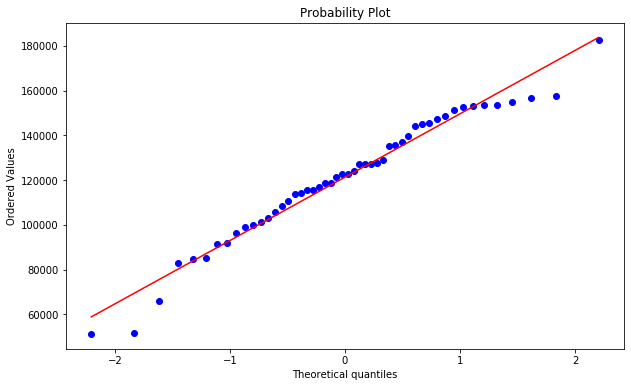

In [28]:
# 1. define dataframe
dataframe = df_regression
# 2. determining methods
methods = 'univariate'
# 3. define numerical colum that will be checked 
column = 'Administration'

#univarite normality test
normality_test(dataframe, methods=methods, numerical_columns=column)

### 1.6.1. Multivariate Normality test

In [30]:
# 1. define dataframe
dataframe = df_regression
# 2. determining methods
methods = 'multivariate'
# 3. define numerical colum that will be checked 
columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

#univarite normality test
normality_test(dataframe, methods=methods, numerical_columns=columns)

,feature,p_value,alpha,decision
0,R&D Spend,0.18,0.05,normal distribution
1,Administration,0.24,0.05,normal distribution
2,Marketing Spend,0.35,0.05,normal distribution
3,Profit,0.77,0.05,normal distribution


## 1.6. Choosing Strong Correlation (Independent to Dependent feature )

In [40]:
#module
def strong_corr(df, ycol=None):
    '''
    Documentation :
    --------------
    * Df   : Dataset name
    * ycol : The target column of the dataframe
    '''
    df_num_corr = df.corr()[ycol][:-1] # -1 because the latest row is SalePrice
    strong_corr = df_num_corr[abs(df_num_corr) > 0.6].sort_values(ascending=False)
    corr = pd.Series(strong_corr, name='Strong Correlation')
    table = pd.concat([corr], axis = 1) 
    print ('Columns have strong correlation :')
    print(table)
    list_features = table.index.values 
    
    return list_features


In [41]:
#Strong Correlation 
# 1. define df
dataframe = df_houseprice

# 2. define target of df
ycol = 'SalePrice'

# 3. Strong Correlation 
list_features = strong_corr(dataframe,ycol)

Columns have strong correlation :
             Strong Correlation
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852


## 1.7. Detection Outliers

In [42]:
def univariate_detect_outliers(df,col = None):
    '''
    parameters : 
    ------------
    df   : object, dataframe
    col  : string 
    
    '''

    #calulate q25, q75, and iqr 
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    proportion = round(len(outliers)/len(df)*100,1)
    
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]

    #print function 
    print('Percentiles: 25th=%.2f, 75th=%.2f, IQR=%.2f' % (q25, q75, iqr))
    print('Identified outliers: %d' % len(outliers))
    print('Outliers proportion: %d' % proportion, '%')
    print('Non-outlier observations: %d' % len(outliers_removed))

In [43]:
univariate_detect_outliers(df_houseprice, col = 'OverallQual')

Percentiles: 25th=5.00, 75th=7.00, IQR=2.00
Identified outliers: 2
Outliers proportion: 0 %
Non-outlier observations: 1458


# 2.  Standard Methode of Visualization 

Before visualization , we will give image for visualization color  

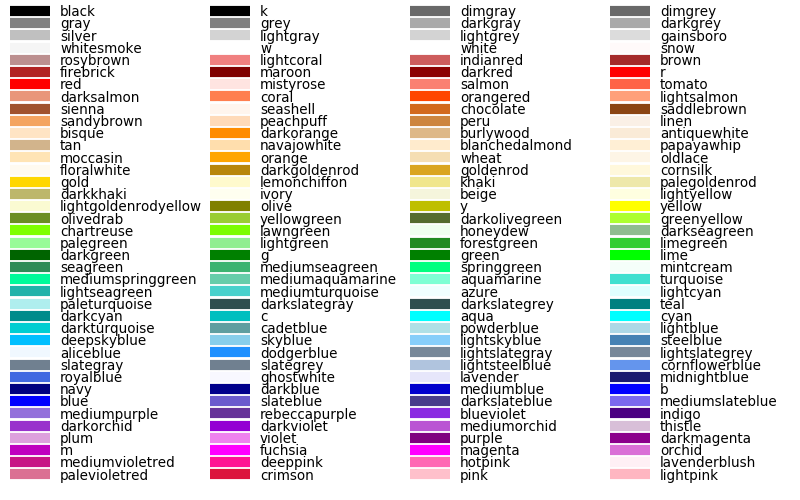

In [45]:
# color option in color seaborn function 
from IPython.display import Image
color = Image(filename = 'image/100_Color_names_python.png', width= 700, height = 700)
color

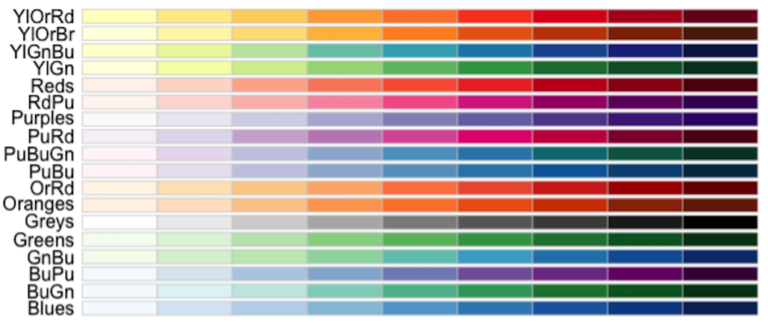

In [32]:
# palatte option in pallate seaborn function  
palette = Image(filename = 'image/color.png', width= 600, height = 600)
palette

## 2.1. Univariate Analisys

Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension)

In [46]:
#Univariat Analisys
def Univariate_plot(df, column, vartype, hue = None ):
    '''
    Documentation :
    Univariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name
    * vartype : variable type : continuos or categorical
                (0) Continuos/Numerical   : Distribution, Violin & Boxplot will be plotted.
                (1) Categorical           : Countplot will be plotted.
    * hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
      
    if vartype == 0:
        fig, ax=plt.subplots(nrows = 3, ncols=1,figsize=(12,12))
        # Distribution Plot
        ax[0].set_title("Distribution Plot",fontsize = 10)
        sns.distplot(df[column], kde=False, fit=stats.gamma, color='darkblue', label = column, ax=ax[0])
        
        # Violinplot 
        ax[1].set_title("Violin Plot",fontsize = 10)
        sns.violinplot(data= df, x=column, color = 'limegreen', inner="quartile", orient='h', ax=ax[1])
        
        #Boxplot
        ax[2].set_title("Box Plot",fontsize = 10)
        sns.boxplot(data =df, x=col,color='cyan',orient="h",ax=ax[2])
        
        fig.tight_layout()
        
    if vartype == 1 :
        #Count plot 
        fig = plt.figure(figsize=(12,6))
        plt.title('Count Plot',fontsize = 20)
        ax=sns.countplot(data=df, x=column, palette="Blues_r")
        ax.set_xlabel(column, fontsize = 15)
        ax.tick_params(labelsize=12)

### 2.1.1. Numerical Features

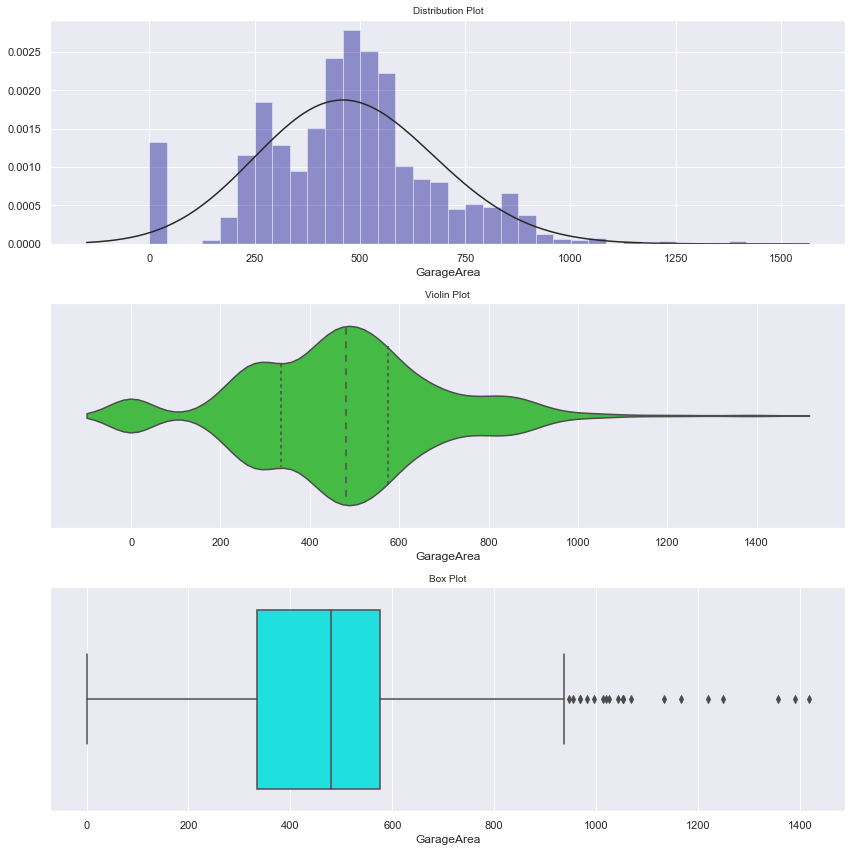

In [48]:
# 1. Define Dataframe
dataframe =df_houseprice

# 2. Define feature
col = 'GarageArea'

# 3. Vartype 
var_type = 0   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type )

### 2.1.2. Categorical Features

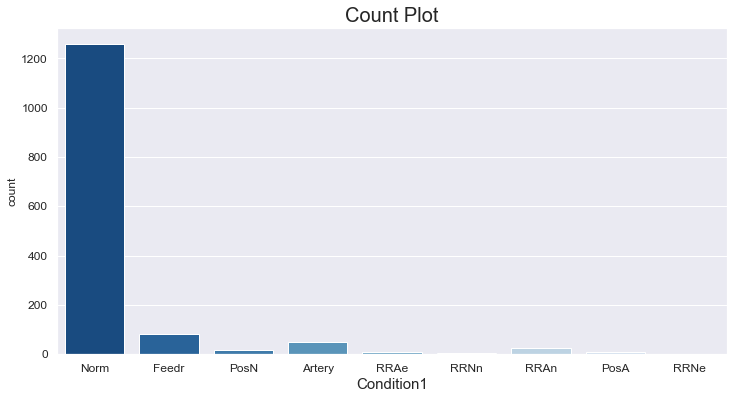

In [49]:
# 1. Define Dataframe
dataframe =df_houseprice

# 2. Define feature
col = 'Condition1'

# 3. Vartype 
var_type = 1   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type )

## 2.2. Bivariate Analisys

summary statistics for assessing the relationship between each variable in the dataset and the target variable of interest

### 2.2.1. Scatter Plot  for Strong Correlation

In [62]:
#module
def scatter_corr(df, feature_Strong_corr = None, ycol = None):
    strong_corr_list = feature_Strong_corr 
    strong_corr = df[strong_corr_list]
    
    features_to_analyse = [col for col in strong_corr_list if col in strong_corr]
    features_to_analyse.append(ycol)
    features_to_analyse
    
    #Regplot
    fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize = (15, 10))
    for i, ax in enumerate(fig.axes):
        if i < len(features_to_analyse)-1:
            sns.regplot(x=features_to_analyse[i],y=ycol, data=df[features_to_analyse], ax=ax)
    fig.tight_layout()

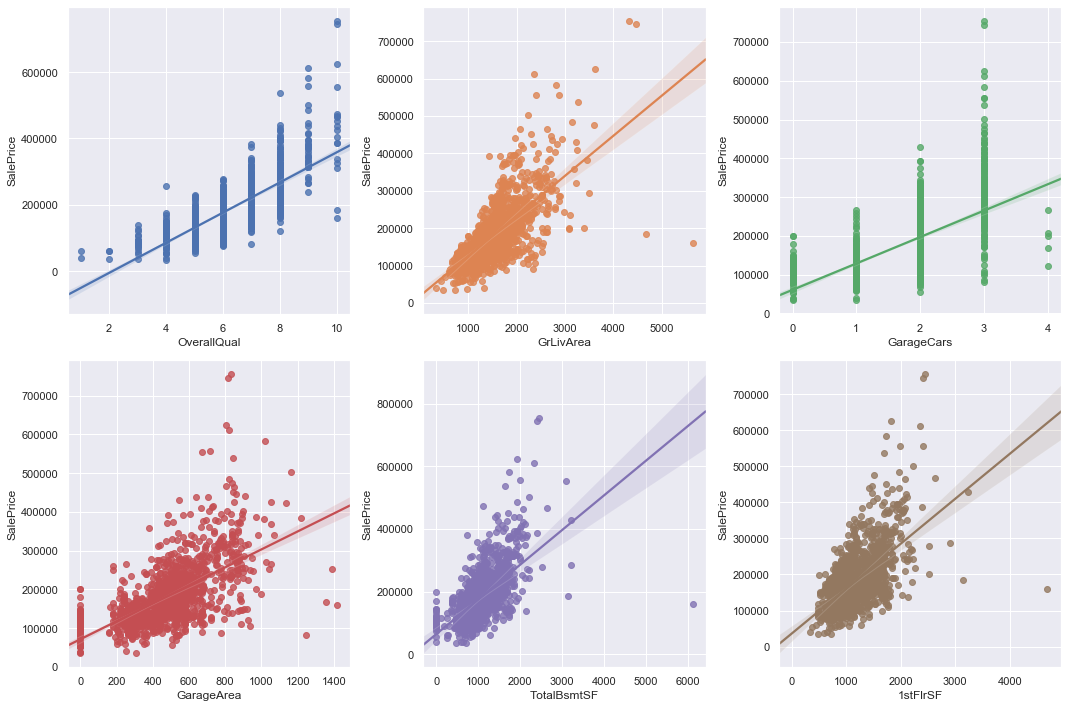

In [63]:
# 1. define dataframe 
dataframe = df_houseprice

# 2. define strong corelation that has been created earlier
features = list_features

# 3. define target feature
ycol = 'SalePrice'

#strong correlation function
scatter_corr(dataframe, feature_Strong_corr= strong_corr_list, ycol = ycol)

The following function will automatically create the bivariate analysis what we need. The graphs are consist of scatter plot, boxplot, and violin plot.  

In [65]:
def bivariate_plot(df, xcol, ycol, plot_type, hue = None, title= None):
    '''
    Documentation :
    --------------
    Bivariate function will plot the graphs based on the parameters.
    * df        : dataframe name
    * xcol      : X Column name
    * ycol      : Y column name
    * plot_type : plot type : scatter plot, boxplot, and violin plot 
                (0) Scactter plot     : graph between xcol(numerical) and ycol(numerical) 
                (1) Boxplot           : graph between xcol(categorical) and ycol(numerical)
                (2) Violin plot       : graph between xcol(categorical) and ycol(numerical)
    * hue     : name of variables in ``data`` or vector data, optional Grouping variable that 
                will produce points with different colors.
    '''
    if title == None :
        title = 'Bivariate Plot'
        
    # Scatter plot 
    if plot_type == 0 :
        fig = plt.figure(figsize=(12,8))
        ax = sns.scatterplot(data=df, x=xcol, y=ycol, s=150)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)
        
    #boxplot
    if plot_type == 1 : 
        fig = plt.figure(figsize = (12, 7))
        ax =sns.boxplot(data=df, x=xcol, y=ycol, hue = hue)
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)
        
    #violinplot 
    if plot_type == 2 :
        fig =plt.figure(figsize = (12, 7))
        ax = sns.violinplot(data=df, x=xcol, y=ycol,  hue = hue)
        plt.xticks(rotation=45)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)

### 2.2.2. Numerical Features

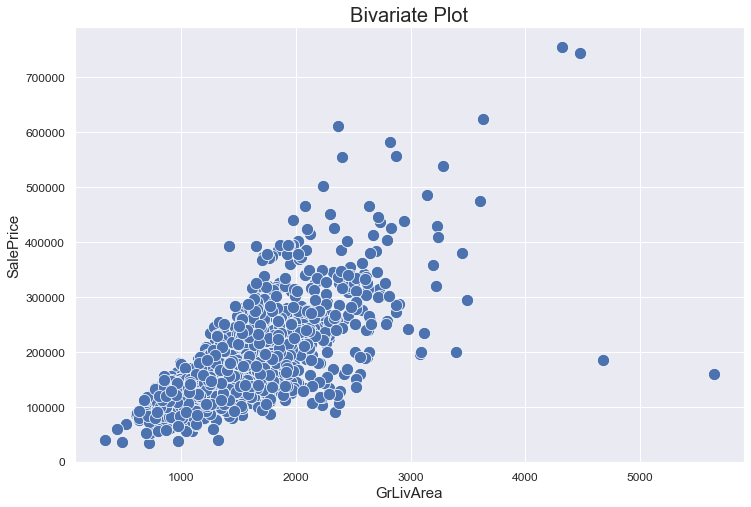

In [66]:
# Sccatter plot For numerical feature 

# 1. Define dataframe
dataframe= df_houseprice

# 2. Define features and target
x = 'GrLivArea'
y = 'SalePrice'

# 3. Plot type
plottype = 0

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### 2.2.3. Categorical Features

### b. Boxplot_Bivariate

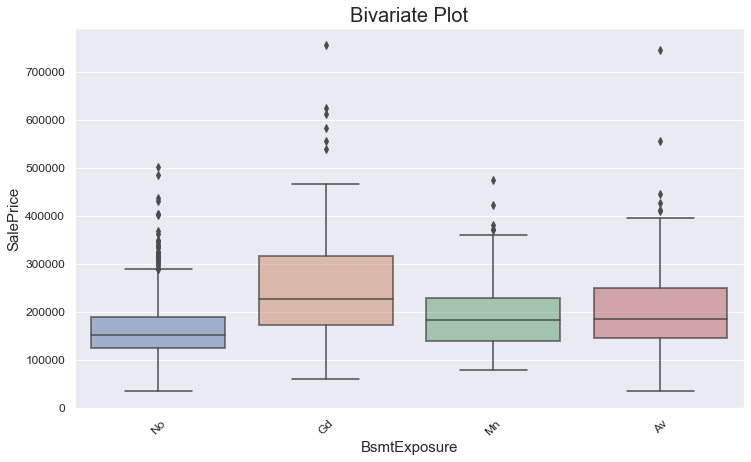

In [67]:
# boxplot For categorical feature 

# 1. Define dataframe
dataframe= df_houseprice

# 2. Define features and target
x = 'BsmtExposure'
y = 'SalePrice'

# 3. Plot type
plottype = 1

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### c . Violinplot Bivariate

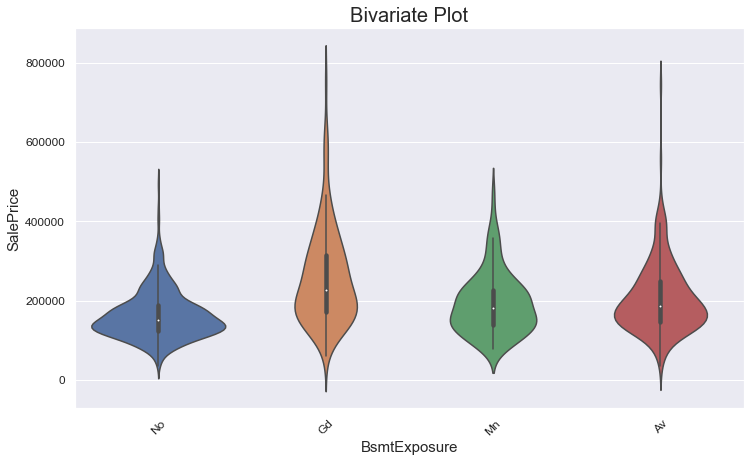

In [40]:
# Violin  For categorical feature 

# 1. Define dataframe
dataframe= df

# 2. Define features and target
x = 'BsmtExposure'
y = 'SalePrice'

# 3. Plot type
plottype = 2

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### 2.2.4. Density Plot

### a. Density Plot 

In [68]:
def multi_density_plot (df, columns, groupBy=None, plot_per_row=None):   
    '''
    Documentation :
    --------------
    * df           : DataFrame name
    * columns      : array of numeric columns' name
    * groupBy      : string
    * plot_per_row : integer
    '''
    if plot_per_row is None:
        plot_per_row = 2
    
    # Counter and plot number
    n = 1
    # Total plots
    size = len(columns)
    # Total rows
    total_row = round(size/plot_per_row + 1, 0)
    
    if groupBy is not None:
        plt.figure(figsize=(20, total_row * 5))
        for column in columns:
            plt.subplot(total_row, plot_per_row, n) # (row, column, panel number)
            df.groupby(groupBy)[column].plot.density(title=column)
            plt.legend()
            n = n + 1
        plt.show()
    else:
        plt.figure(figsize=(20, total_row * 5))
        for column in columns:
            plt.subplot(total_row, plot_per_row, n) # (row, column, panel number)
            df[column].plot.density(title=column)
            plt.legend()
            n = n + 1
        plt.show()

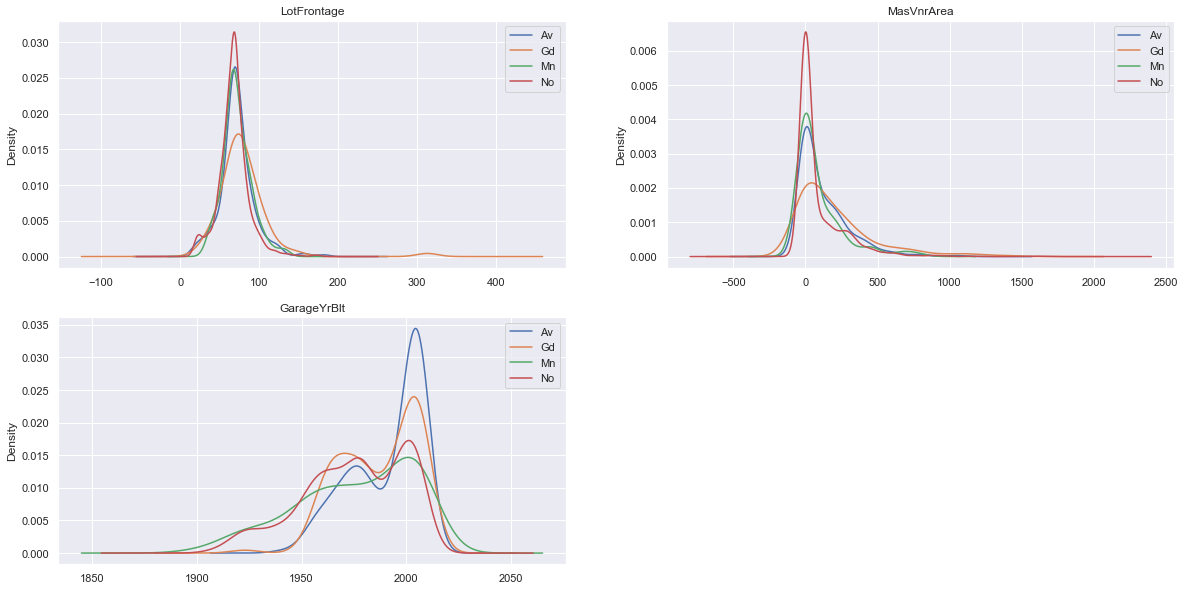

In [69]:
#1. Make List categorical features
float_type=['LotFrontage','MasVnrArea','GarageYrBlt']

#2. Input Dataframe
dataframe = df_houseprice

#Multi density plot
multi_density_plot(dataframe, float_type, 'BsmtExposure')

## 2.3. Multivariate Analysis

Multivariate visualizations to understand interactions between different fields in the data

In [73]:
def multivariate(df, column, plot_type ):
    '''
    Documentation :
    --------------
    Multivvariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name (array)
    * plot : plot_type : hitmap and pairplot
                (0) Hitmap    : Hitmap graph will be plotted.
                (1) pairplot  : pairplot graph will be plotted.
    '''
    # hitmap plot
    if plot_type == 0 :
        corrMatt = df[column].corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)] = False
        fig,ax= plt.subplots(figsize=(15,12))
        fig.set_size_inches(20,5)
        sns.heatmap(corrMatt, mask=mask,vmax=0.9, square=True,annot=True)
        
        
    # pairplot 
    if plot_type == 1 :
        pairplot = sns.pairplot(df[column], size=2, aspect=2,
                                plot_kws=dict(edgecolor="k", linewidth=0.5),
                                diag_kind="kde", diag_kws=dict(shade=True))
        fig = pairplot.fig 
        fig.subplots_adjust(top=0.90, wspace=0.2)
        fig.suptitle('Pairplot', fontsize=15)

### 2.3.1. Hitmap Correlation 

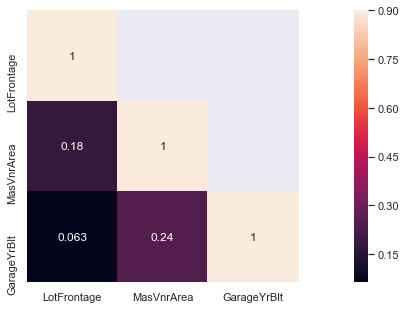

In [74]:
# 1. Define Dataframe
dataframe = df_houseprice

# 2. Define Column
colname = float_type

# 3. Plot_type
plot = 0

# 4. Visualization 
multivariate(dataframe, colname, plot)

### 2.3.2 Pairplot  

c:\users\triano nurhikmat\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


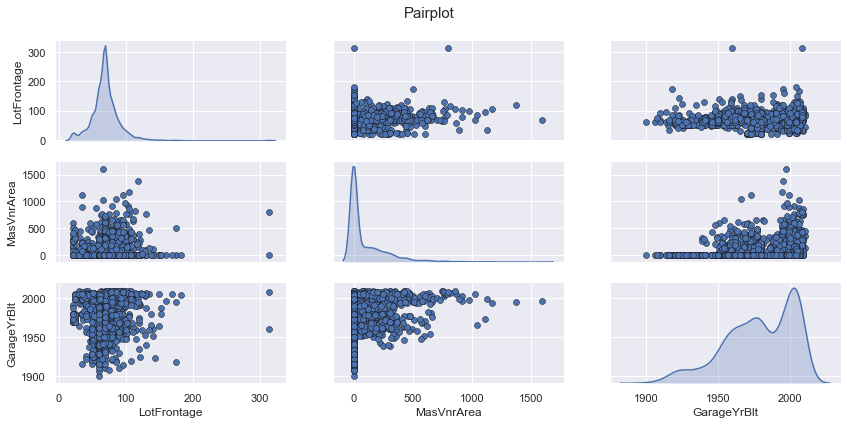

In [75]:
# 1. Define Dataframe
dataframe = df_houseprice

# 2. Define Column
colname = float_type

# 3. Plot_type
plot = 1

# 4. Visualization 
multivariate(dataframe, colname, plot)

 ## 2.4 Forecasting Visualization 

In [76]:
#Forecasting 
df_forecasting.head()

,Time,GEMS_GEMS_SPENT
0,5/1/17,1199436
1,5/2/17,1045515
2,5/3/17,586111
3,5/4/17,856601
4,5/5/17,793775


No handles with labels found to put in legend.


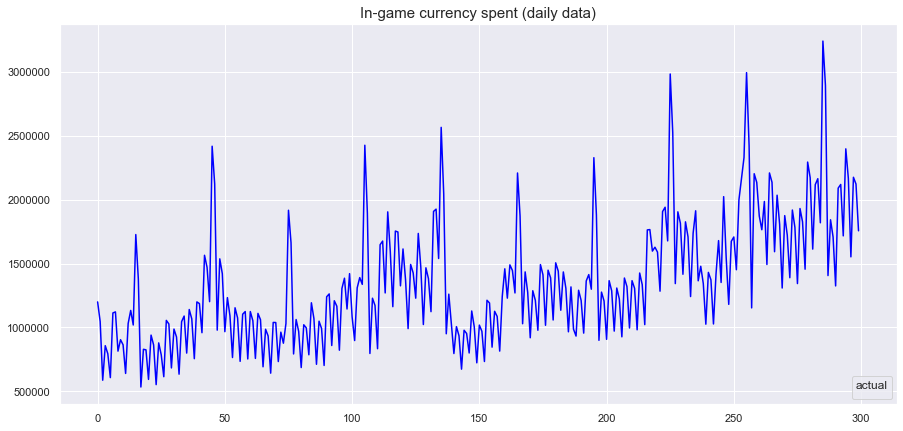

In [77]:
# Visualization for forecasting 

# 1. Define Dataframe 
input_df_forecast = df_forecasting

# 2. Define Feature thath will visualized 
feature = 'GEMS_GEMS_SPENT'

# 3. Define Title of graph 
title = 'In-game currency spent (daily data)'

#module
def timeseries_plot(df, column, title = None):
    '''
    Documentation :
    --------------
    Multivvariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name 
    * title   : String, Default Time Series Graph 
    '''
    #Default Title
    if title is None:
        title = 'Time Series Graph'
        
    plt.figure(figsize=(15, 7))
    plt.plot(df[feature], color= 'blue')
    plt.title(title, fontsize= 15)
    plt.grid(True)
    plt.legend(title="actual", loc=4, fontsize='small', fancybox=True)
    
#visualization
timeseries_plot(input_df_forecast,feature, title)

## 2.7. Correlation

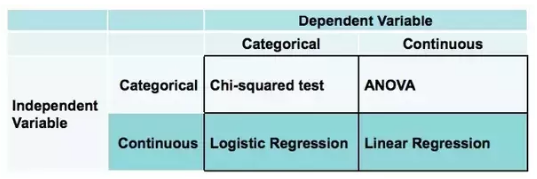

In [78]:
correlation= Image(filename = 'image/Correlation.PNG', width= 600, height = 600)
correlation

### 2.6.1. Correlation Between Independent (Categoric) & Dependent (Categoric) = Chi-Square test

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.

Hypothesis:

H0 (Null hypothesis)        : Assumes that there is no association between the two variables.

H1 (Alternative hypothesis) : Assumes that there is an association between the two variables.

In [80]:
# Seperate the features based on types of data
categorical_list = []
numerical_list = []

#Define dataframe
dataframe = df_houseprice

# module
def dtypes_list(df):
    '''
    Summary :
    * 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    * 2. Columns in dataframe will be seperated based on the dtypes
    * 3. All of the column will be entered to the list that have been created
    '''
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
        else:
            numerical_list.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_list, name='Categorical Feature')
    numerical = pd.Series(numerical_list, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes
    

#input df to the module 
dtypes_list(dataframe)


,Categorical Feature,Numerical Feature
0,MSZoning,Id
1,Street,MSSubClass
2,LotShape,LotFrontage
3,LandContour,LotArea
4,Utilities,OverallQual
5,LotConfig,OverallCond
6,LandSlope,YearBuilt
7,Neighborhood,YearRemodAdd
8,Condition1,MasVnrArea
9,Condition2,BsmtFinSF1


In [81]:
# Df categoric 
df_categ_list = df[categorical_list]
df_categ_list.head()

NameError: name 'df' is not defined

In [82]:
#Module Chi-square
def ChiSquare_Test(df, ycol, xcol, alpha):
    '''
    Parameters : 
    --------------
    * df     : Dataframe Name
    * ycol   : y target (Categorcal Variable)
    * xcol   : x target array (Categorical Variable)
    * alpha  : Significance Level (0.1, 0.05, 0.01)
    
    ex:
    # 1. Define Dataframe
    df_categ = df_categ_list
    
    # 2. Input y column  
    y = 'SaleType'
    
    # 3. Input X columns
    x =['Street','LandContour','LandSlope']
   
   # 4. Significance Level 
    a = 0.05
    
    # 5. Chi-Square Analisys 
    ChiSquare_Test(df = df_categ_list, ycol=y, xcol= x, alpha= a)
    '''
    result = {}
    
    #Looping for every x variable in Dataframe
    for x in xcol :
        crosstab = pd.crosstab(df[ycol],df[x])
        _, p, _, _ = chi2_contingency(crosstab)
        
        #logic
        if p <= alpha :
            result[x] = 'Correlated'
        else :
            result[x] = 'Not Correlated'
    
    #The result will be created to the pandas dataframe 
    df = pd.DataFrame.from_dict(result, orient='Index', columns=['Decision'])
    df.index.name='Colname'
    
    return df

In [83]:
# 1. Define Dataframe
df_categ = df_categ_list
# 2. Input y column  
y = 'SaleType'

# 3. Input X columns
x =['Street','LandContour','LandSlope']

# 4. Significance Level 
a = 0.05

# 5. Chi-Square Analisys 
ChiSquare_Test(df = df_categ_list, ycol=y, xcol= x, alpha= a)

,Decision
Colname,
Street,Correlated
LandContour,Not Correlated
LandSlope,Not Correlated


### 2.6.2. Correlation Between Independent (Categoric) & Dependent (Numeric) = ANOVA

In [84]:
df=pd.read_csv('data/correlation.csv')
df

,jk,obat,tb
0,L,A,178
1,P,A,171
2,P,B,171
3,P,B,168
4,L,C,176
5,L,B,178
6,L,C,173
7,P,A,160
8,P,A,171
9,P,B,168


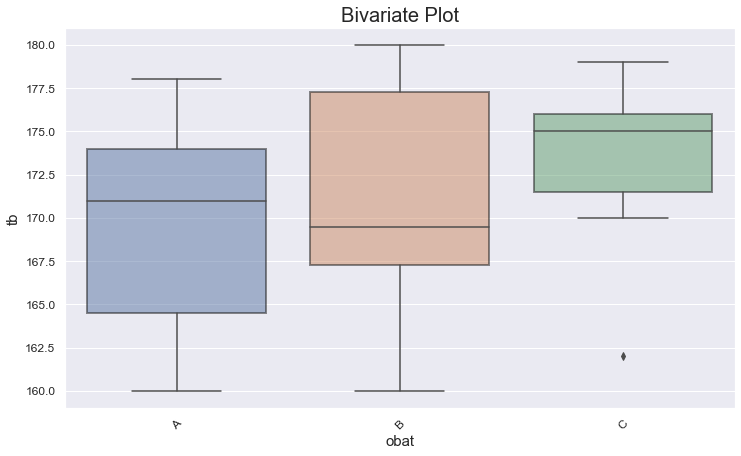

In [85]:
bivariate_plot(df, xcol='obat',ycol='tb',plot_type=1)

In [86]:
anova_model = ols('tb ~ obat', data=df).fit()
anova_model

In [87]:
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table)

              sum_sq    df        F    PR(>F)
obat       45.228896   2.0  0.53536  0.594034
Residual  802.589286  19.0      NaN       NaN


### 2.6.3. Correlation Between Independent (Numeric) & Dependent (Categoric) = Logistic Regression 

In [88]:
def log_regression(df, ycol = None, alpha = None):
    if alpha == None :
        alpha = 0.05
    #determine y and x variable     
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #regression logistic
    model = sm.Logit(y,x)
    #regression 
    result = model.fit()
    #get p-values
    result             = result.pvalues
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    
    return result 

In [89]:
result = log_regression(df_classification, ycol = 'insuranceclaim')
result

Optimization terminated successfully.
         Current function value: 0.457311
         Iterations 7


,p_value,alpha,decision
features,,,
age,3.231933e-03,0.05,Correlated
sex,2.807130e-02,0.05,Correlated
bmi,2.479934e-18,0.05,Correlated
children,2.402023e-56,0.05,Correlated
smoker,7.529887e-10,0.05,Correlated
region,9.453126e-03,0.05,Correlated
charges,1.616896e-03,0.05,Correlated


### 2.6.4. Correlation Between Independent (Numeric) & Dependent (Numeric) = Linear Regression 

In [90]:
def lin_regression(df, ycol = None, alpha=None):
    if alpha == None :
        alpha = 0.05 
    #determine y and x variable 
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #build model 
    model = sm.OLS(y,x)
    #fit model OLS 
    result = model.fit()
    #get p-values
    result             = result.pvalues
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    return result 

In [92]:
simple_reg = df_regression.drop(['State'], axis = 1)

In [94]:
#input data frame and target (Profit) into the function 
result = lin_regression(simple_reg, ycol = 'Profit')
result

,p_value,alpha,decision
features,,,
R&D Spend,1.168085e-14,0.05,Correlated
Administration,7.390832e-14,0.05,Correlated
Marketing Spend,5.107735e-04,0.05,Correlated
